In [2]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

In [3]:
# Create a City class that will allow us to create and handle our cities.
# These are simply our (x, y) coordinates.
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [4]:
# Here we take fitness as the inverse of the route distance.
# As we want to minimize route distance, so a larger fitness score is better.
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [5]:
# Create our initial population (aka first generation).
#To create an individual, we randomly select the order in which we visit each city.
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [6]:
#Create the population by looping.
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [7]:
#Determine fitness
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [8]:
# Selecting the mating pool.
# Introducing Elitism i.e. the best performing individuals from 
# the population will automatically carry over to the next generation. 
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [9]:
# Creating the Mating Pool i.e extracting the selected individuals from our population.
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [10]:
# Using the concept of Ordered Crossover.
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [11]:
# Here we use elitism to retain the best routes from the current population.
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [12]:
# Chromosome mutation of swap operation.
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [13]:
#extending the mutate function to run through the new population.
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [14]:
# Creating nextGen by repeating the above functions.
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [15]:
# Evolution
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    print("Intial Coordinates or points:",population)
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [16]:
# Creating a list of cities to travel between.
cityList = []

for i in range(0,25):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

In [17]:
cityList

[(134,151),
 (57,154),
 (165,51),
 (190,75),
 (174,107),
 (79,181),
 (175,115),
 (130,179),
 (26,100),
 (117,66),
 (5,59),
 (195,164),
 (75,166),
 (24,159),
 (66,23),
 (4,8),
 (148,59),
 (15,52),
 (34,80),
 (28,94),
 (169,124),
 (34,141),
 (186,46),
 (179,115),
 (137,94)]

In [18]:
# Plotting the GA(Genetic Algorithm)
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    
    '''
    abc = []
    abc.append(rankRoutes(pop)[0][0])
    for i in range(0,25):
        rankRoutes(pop)[0][1]
        abc.append(rankRoutes(pop)[0][1])
    plt.plot(abc)
    plt.ylabel("y axis")
    plt.xlabel("x axis")
    plt.show()
    '''

In [19]:
#Applying GA
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

Intial Coordinates or points: [(134,151), (57,154), (165,51), (190,75), (174,107), (79,181), (175,115), (130,179), (26,100), (117,66), (5,59), (195,164), (75,166), (24,159), (66,23), (4,8), (148,59), (15,52), (34,80), (28,94), (169,124), (34,141), (186,46), (179,115), (137,94)]
Initial distance: 2002.257862049108
Final distance: 769.7582700039484


[(195,164),
 (134,151),
 (130,179),
 (79,181),
 (75,166),
 (57,154),
 (24,159),
 (34,141),
 (26,100),
 (28,94),
 (34,80),
 (5,59),
 (15,52),
 (4,8),
 (66,23),
 (117,66),
 (137,94),
 (148,59),
 (165,51),
 (186,46),
 (190,75),
 (174,107),
 (175,115),
 (179,115),
 (169,124)]

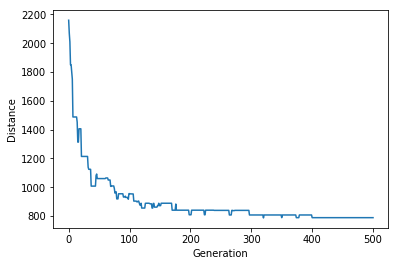

In [20]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)